<a href="https://colab.research.google.com/github/suryakanthPS/DS_Mini-Projects/blob/main/As14_Q2_DT_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
#import data
data = pd.read_csv("/content/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Urban'] = le.fit_transform(data['Urban'])
data['US'] = le.fit_transform(data['US'])
data['ShelveLoc'] = le.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


## Model Building

In [ ]:
#Dividing the data into independent and dependent variable
X = data.iloc[:,0:6]
y = data['ShelveLoc']

In [ ]:
#Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

### Model building by GINI method - Regression problems

In [ ]:
# fitting GINI method DT
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = 'gini', max_depth =3)
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Model prediction
y_pred = gini.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2])

In [ ]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy=", acc*100)

[[ 8  2 23]
 [ 0  4  1]
 [ 5 12 25]]
Accuracy= 46.25


### Model building by Entropy method - classification problems

In [ ]:
# fitting Entropy method DT
from sklearn.tree import DecisionTreeClassifier
entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

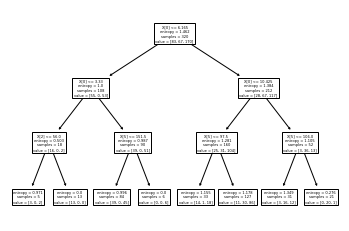

In [ ]:
#plot decision tree
from sklearn import tree
tree.plot_tree(entropy);

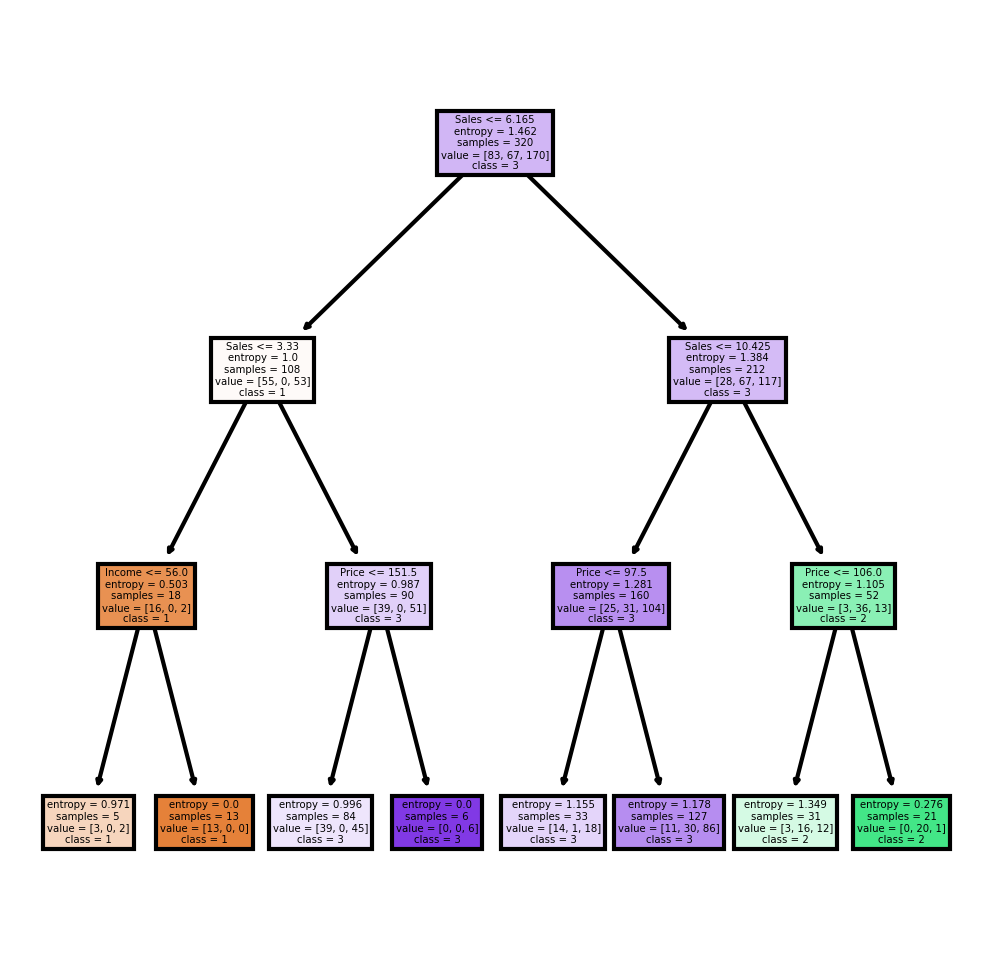

In [ ]:
import matplotlib.pyplot as plt
fn = ['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [ ]:
#Model prediction
y_pred = entropy.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [ ]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy score :", acc*100)

[[ 1  0  3]
 [ 0  8  5]
 [12 10 41]]
Accuracy score : 62.5
